## Video Games Sales Data EDA

#### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Video Game Sales from 80s-2020

Link: https://www.kaggle.com/datasets/gregorut/videogamesales

In [5]:
vg = pd.read_csv('D:/Portfolio/Python EDA/Video_Games_EDA/vgsales.csv', index_col=0)

#### Understanding the Structure of Data

In [6]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


There are 10 columns, which 6 of them are floating point (numbers) and can be use for statistical measure, while the other 4 are object (string).

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

In [7]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


head() tells the first 5 value inside of a dataframe

In [8]:
vg.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


tail() tells the last 5 values inside of a dataframe

In [9]:
vg.shape #rows, col

(16598, 10)

shape tells the numbers of rows and columns of a dataframe. 

From the shape above, we can infer that the dataset vgsales.csv have **16k rows and 10 columns**.

#### Check Null Values

In [10]:
vg.isnull()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16596,False,False,False,False,False,False,False,False,False,False
16597,False,False,False,False,False,False,False,False,False,False
16598,False,False,False,False,False,False,False,False,False,False


Based on the dataframe above, there are zero values that has null values. So we can proceed to do analysis without having to clean and drop the null values.

#### Check Duplicate Values

In [11]:
vg.duplicated()

Rank
1        False
2        False
3        False
4        False
5        False
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Length: 16598, dtype: bool

Based on the duplicated() function above, the dataset does not have any duplicate values. Meaning that we do not have to change/drop anything on the dataset.

#### Categorical Analysis

In [12]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
vg.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [21]:
vg.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [23]:
# FInding the year on year average sales
year_grp = vg.groupby(['Year'])
year_grp['Global_Sales'].mean()

Year
1980.0    1.264444
1981.0    0.777609
1982.0    0.801667
1983.0    0.987647
1984.0    3.597143
1985.0    3.852857
1986.0    1.765238
1987.0    1.358750
1988.0    3.148000
1989.0    4.320588
1990.0    3.086875
1991.0    0.786098
1992.0    1.771163
1993.0    0.766333
1994.0    0.654298
1995.0    0.402329
1996.0    0.757224
1997.0    0.695433
1998.0    0.676702
1999.0    0.743402
2000.0    0.577536
2001.0    0.687697
2002.0    0.477105
2003.0    0.461742
2004.0    0.549554
2005.0    0.488778
2006.0    0.516905
2007.0    0.508428
2008.0    0.475420
2009.0    0.466317
2010.0    0.476926
2011.0    0.453020
2012.0    0.553333
2013.0    0.674194
2014.0    0.579124
2015.0    0.430684
2016.0    0.206192
2017.0    0.016667
2020.0    0.290000
Name: Global_Sales, dtype: float64

YoY Median

In [26]:
# FInding the year on year median
year_grp = vg.groupby(['Year'])
year_grp['Global_Sales'].median()

Year
1980.0    0.770
1981.0    0.465
1982.0    0.540
1983.0    0.770
1984.0    1.485
1985.0    1.015
1986.0    1.360
1987.0    0.885
1988.0    1.510
1989.0    1.610
1990.0    1.520
1991.0    0.380
1992.0    0.780
1993.0    0.355
1994.0    0.270
1995.0    0.140
1996.0    0.220
1997.0    0.280
1998.0    0.260
1999.0    0.305
2000.0    0.250
2001.0    0.250
2002.0    0.170
2003.0    0.200
2004.0    0.210
2005.0    0.170
2006.0    0.110
2007.0    0.150
2008.0    0.170
2009.0    0.160
2010.0    0.150
2011.0    0.140
2012.0    0.170
2013.0    0.190
2014.0    0.160
2015.0    0.090
2016.0    0.050
2017.0    0.010
2020.0    0.290
Name: Global_Sales, dtype: float64

In [27]:
#Finding out years with highest sales
year_grp = vg.groupby(['Year'])
year_grp['Global_Sales'].max()

Year
1980.0     4.31
1981.0     4.50
1982.0     7.81
1983.0     3.20
1984.0    28.31
1985.0    40.24
1986.0     6.51
1987.0     4.38
1988.0    17.28
1989.0    30.26
1990.0    20.61
1991.0     4.61
1992.0    11.18
1993.0    10.55
1994.0     9.30
1995.0     5.15
1996.0    31.37
1997.0    10.95
1998.0    14.64
1999.0    23.10
2000.0     6.39
2001.0    14.98
2002.0    16.15
2003.0     7.20
2004.0    20.81
2005.0    24.76
2006.0    82.74
2007.0    22.72
2008.0    35.82
2009.0    33.00
2010.0    21.82
2011.0    14.76
2012.0    14.03
2013.0    21.40
2014.0    11.98
2015.0    14.24
2016.0     4.77
2017.0     0.03
2020.0     0.29
Name: Global_Sales, dtype: float64

#### Visualizations

In [28]:
vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Game Sales Shares Per Region

In [29]:
total_global_sales = vg['Global_Sales'].sum()
total_NA_sales = vg['NA_Sales'].sum() 
total_JP_sales = vg['JP_Sales'].sum()
total_EU_sales = vg['EU_Sales'].sum()
total_other_sales = vg['Other_Sales'].sum()

In [30]:
NA_shares = total_NA_sales / total_global_sales
print(NA_shares)

0.49245889216227007


In [31]:
JP_shares = total_JP_sales / total_global_sales
print(JP_shares)

0.14472604490361463


In [32]:
EU_shares = total_EU_sales / total_global_sales
print(EU_shares)

0.2728710691400872


In [33]:
other_shares = total_other_sales / total_global_sales
print(other_shares)

0.08942944518431827


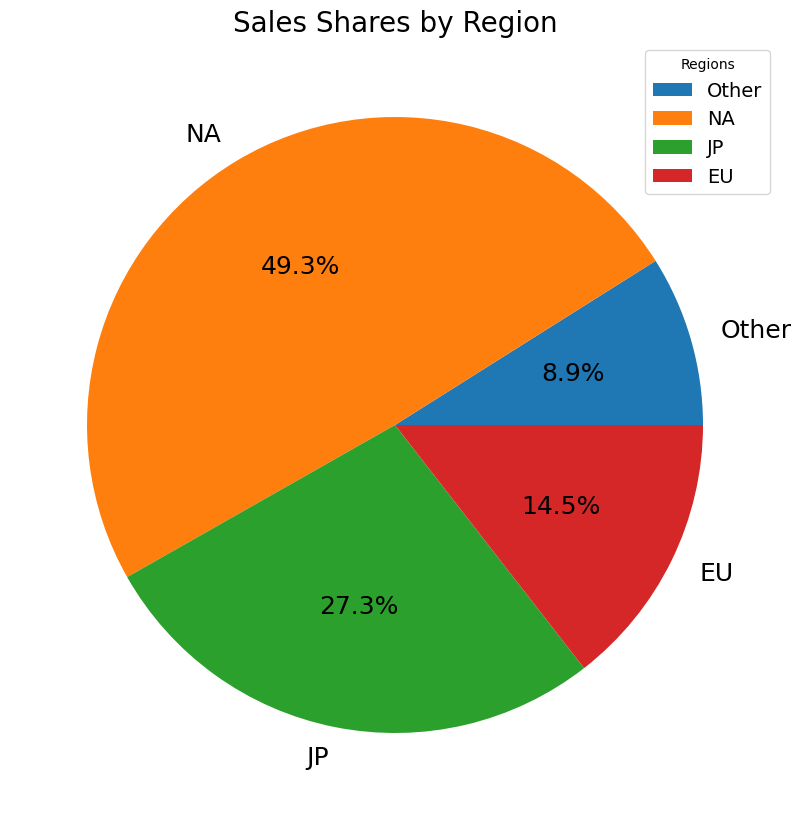

In [34]:
# labels
labels = ['Other', 'NA', 'JP', 'EU',]

sales_shares = np.array([other_shares, NA_shares, EU_shares, JP_shares])

# plotting
plt.figure(figsize=(18,10))
plt.pie(sales_shares, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Sales Shares by Region', fontdict={'fontsize': 20})

# legend
plt.legend(title='Regions', loc='upper right', fontsize='14')

plt.show()

##### Highest Selling Game Per Region

Global (Worldwide)

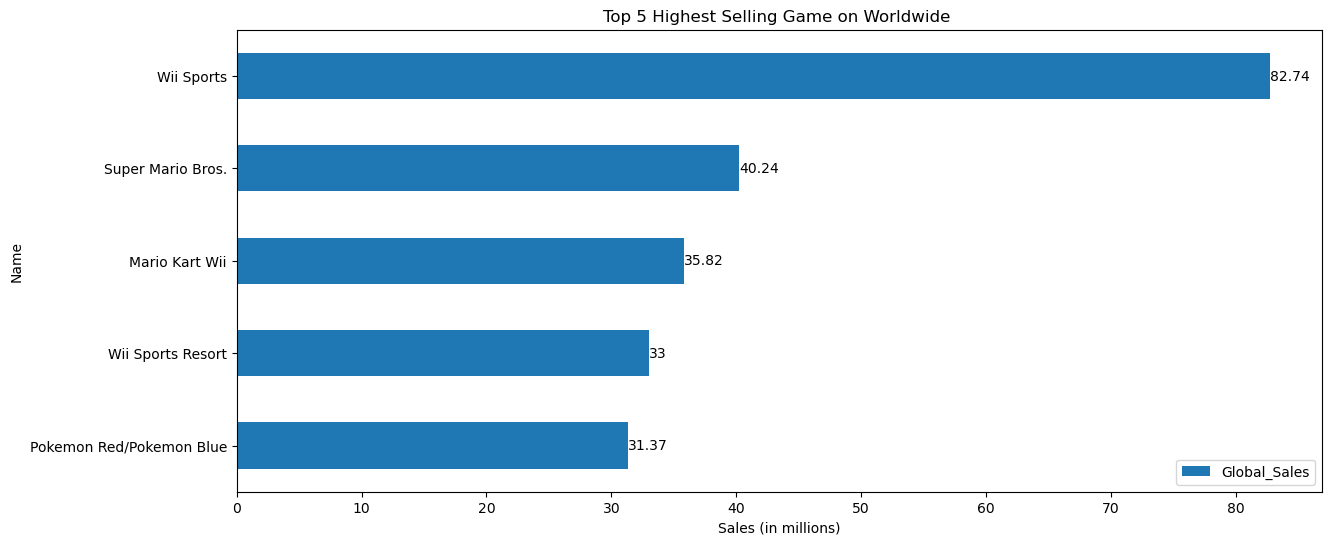

In [35]:
biggest_global_sale = vg.groupby('Global_Sales')['Name'].max().reset_index()
result_global_sale = biggest_global_sale.sort_values(by='Global_Sales', ascending=True).tail(5)

result_global_sale.set_index('Name', inplace=True)
ax = result_global_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game on Worldwide ')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

NA

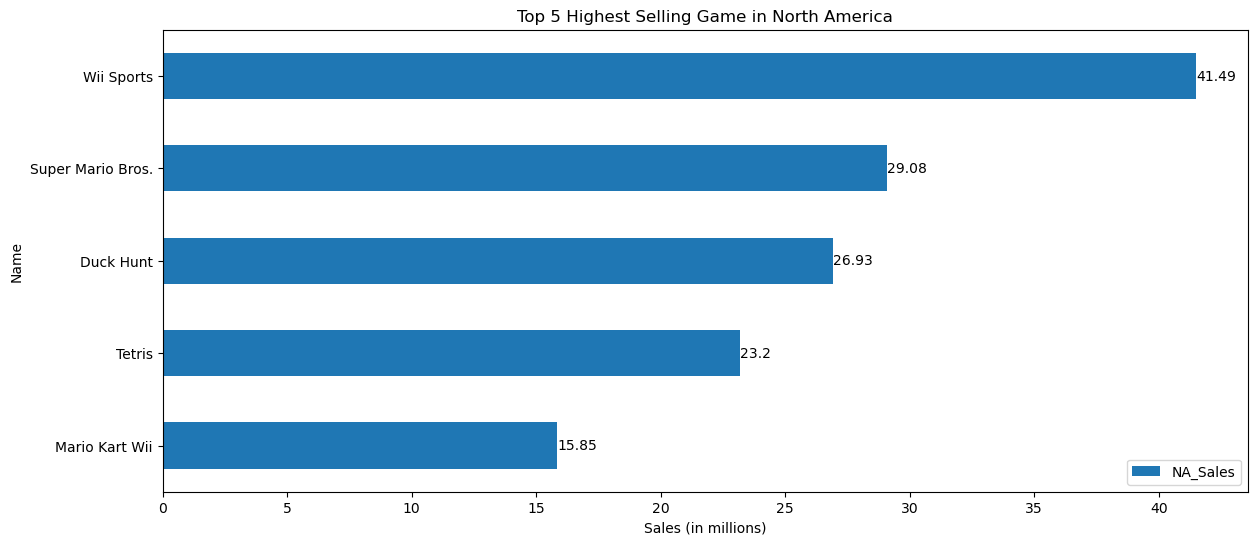

In [36]:
biggest_NA_sale = vg.groupby('NA_Sales')['Name'].max().reset_index()
result_NA_sale = biggest_NA_sale.sort_values(by='NA_Sales', ascending=True).tail(5)

result_NA_sale.set_index('Name', inplace=True)
ax = result_NA_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in North America')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

JP

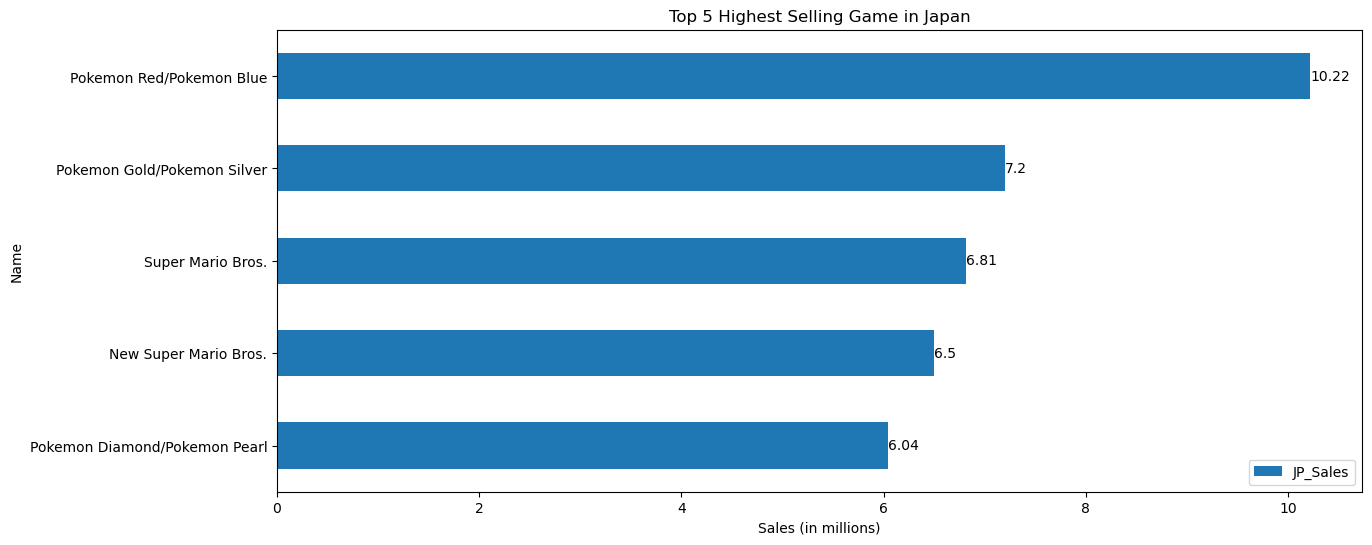

In [37]:
biggest_JP_sale = vg.groupby('JP_Sales')['Name'].max().reset_index()
result_JP_sale = biggest_JP_sale.sort_values(by='JP_Sales', ascending=True).tail(5)

result_JP_sale.set_index('Name', inplace=True)
ax = result_JP_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in Japan')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

EU

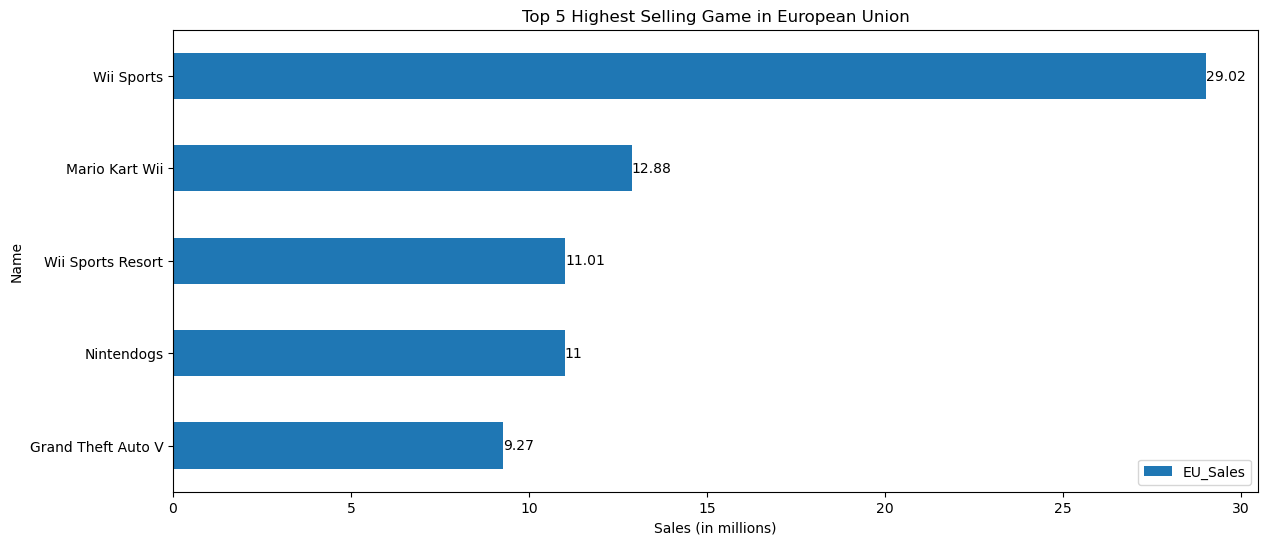

In [38]:
biggest_EU_sale = vg.groupby('EU_Sales')['Name'].max().reset_index()
result_EU_sale = biggest_EU_sale.sort_values(by='EU_Sales', ascending=True).tail(5)

result_EU_sale.set_index('Name', inplace=True)
ax = result_EU_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Selling Game in European Union')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

Other (rest of the world)

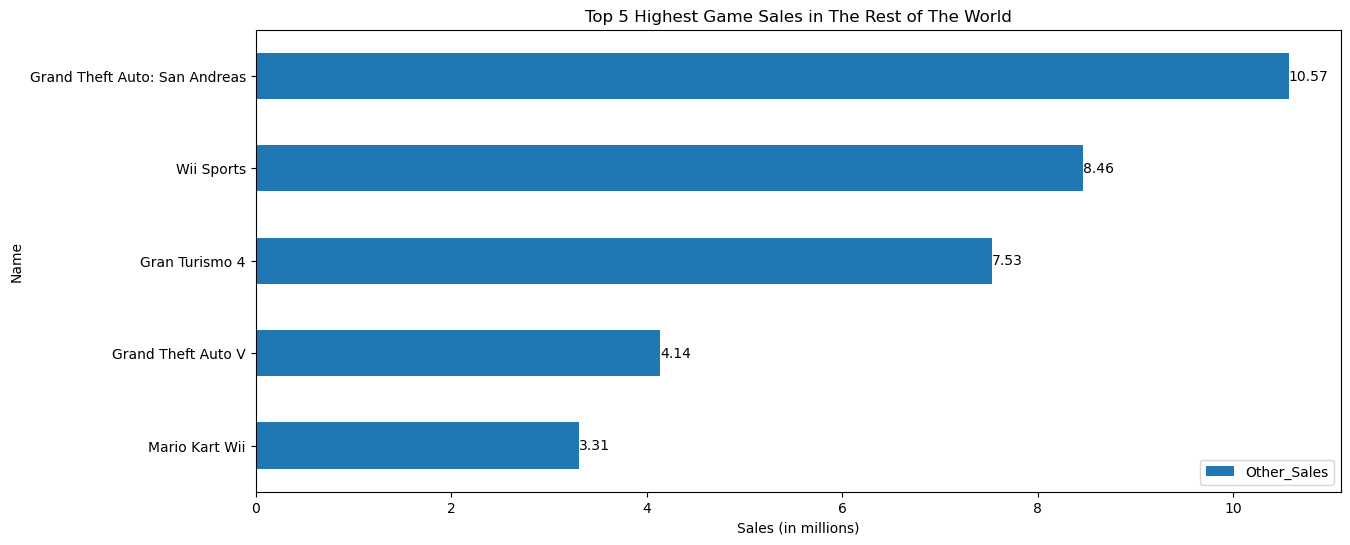

In [39]:
biggest_other_sale = vg.groupby('Other_Sales')['Name'].max().reset_index()
result_other_sale = biggest_other_sale.sort_values(by='Other_Sales', ascending=True).tail(5)

result_other_sale.set_index('Name', inplace=True)
ax = result_other_sale.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Highest Game Sales in The Rest of The World')
plt.xlabel('Sales (in millions)')
plt.ylabel('Name')
plt.show()

##### Highest Game Sale YoY Per Region

Global (Worldwide)

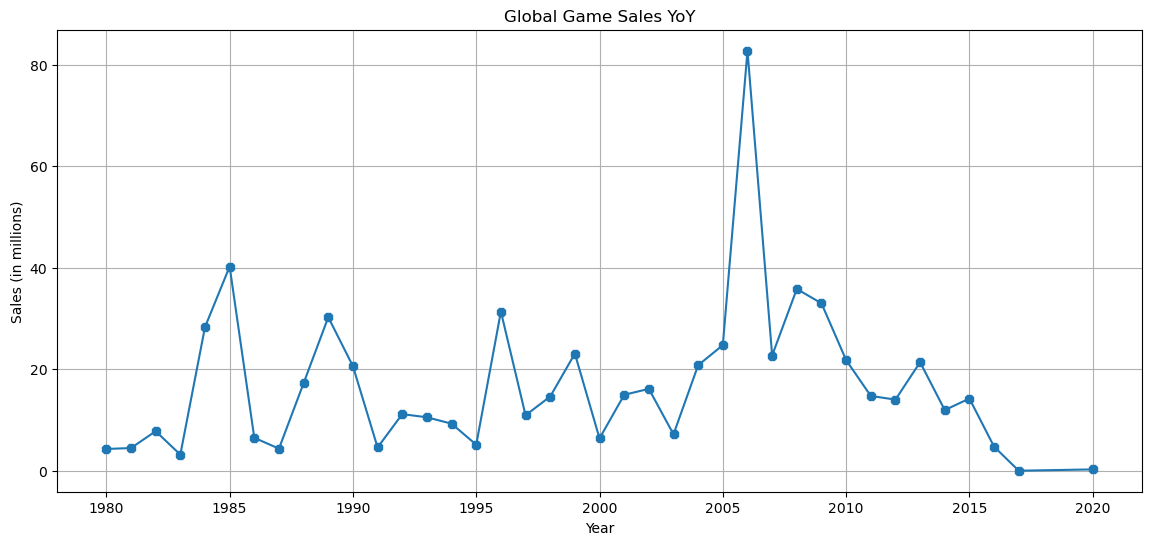

In [40]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['Global_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['Global_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Global Game Sales YoY')

plt.grid(True)

plt.show()

NA

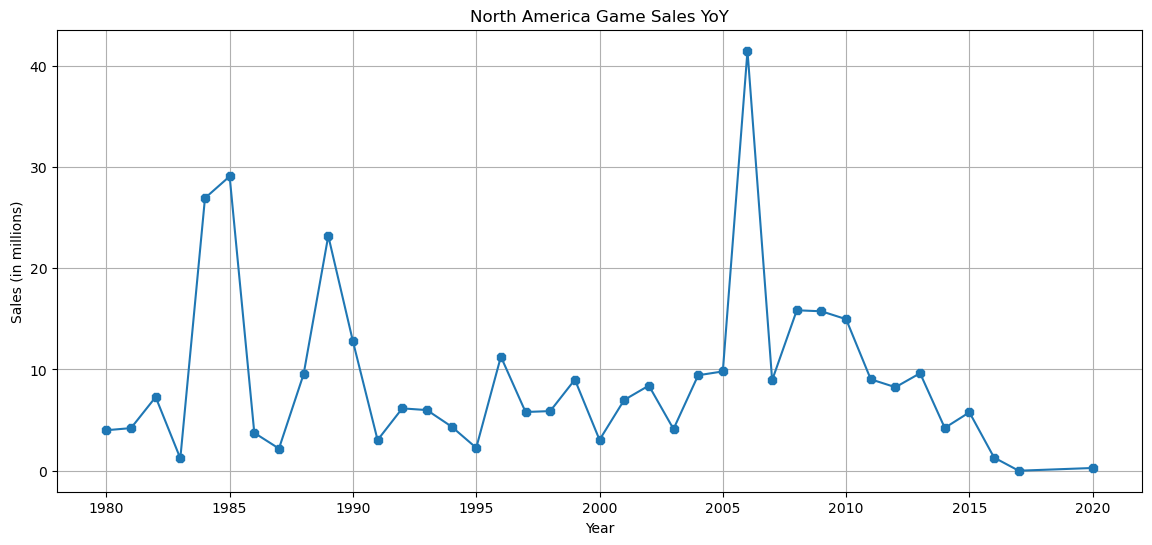

In [41]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['NA_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['NA_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('North America Game Sales YoY')

plt.grid(True)

plt.show()

JP

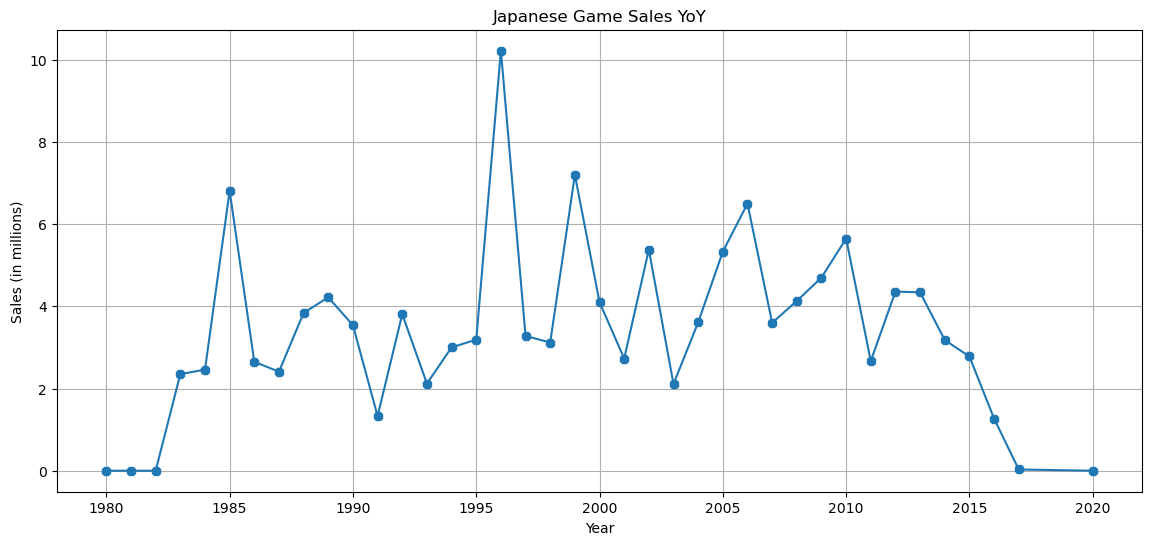

In [42]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['JP_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['JP_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Japanese Game Sales YoY')

plt.grid(True)

plt.show()

EU

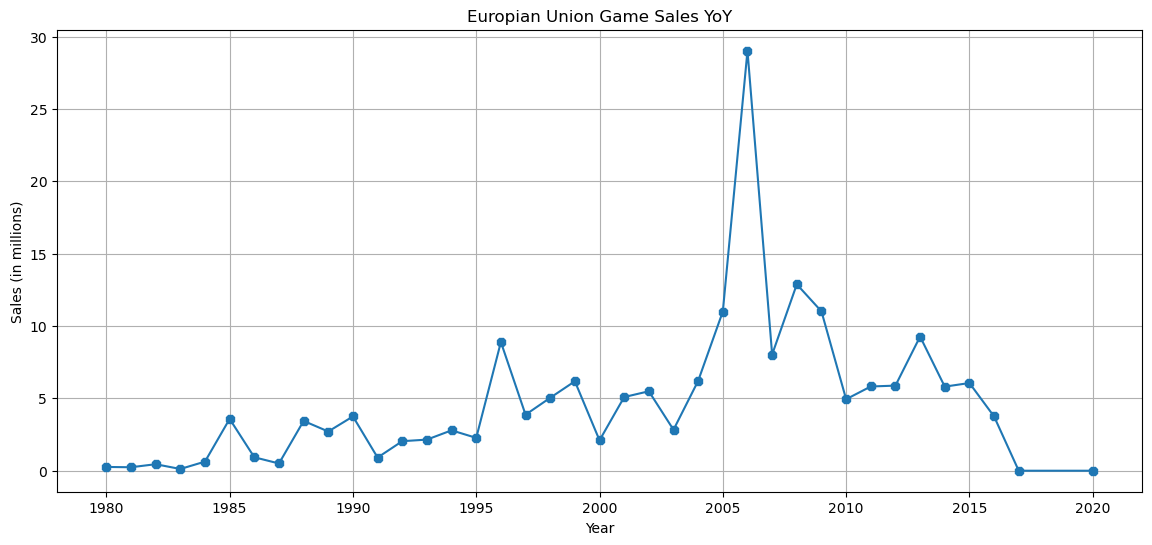

In [43]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['EU_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['EU_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Europian Union Game Sales YoY')

plt.grid(True)

plt.show()

Other (rest of the world)

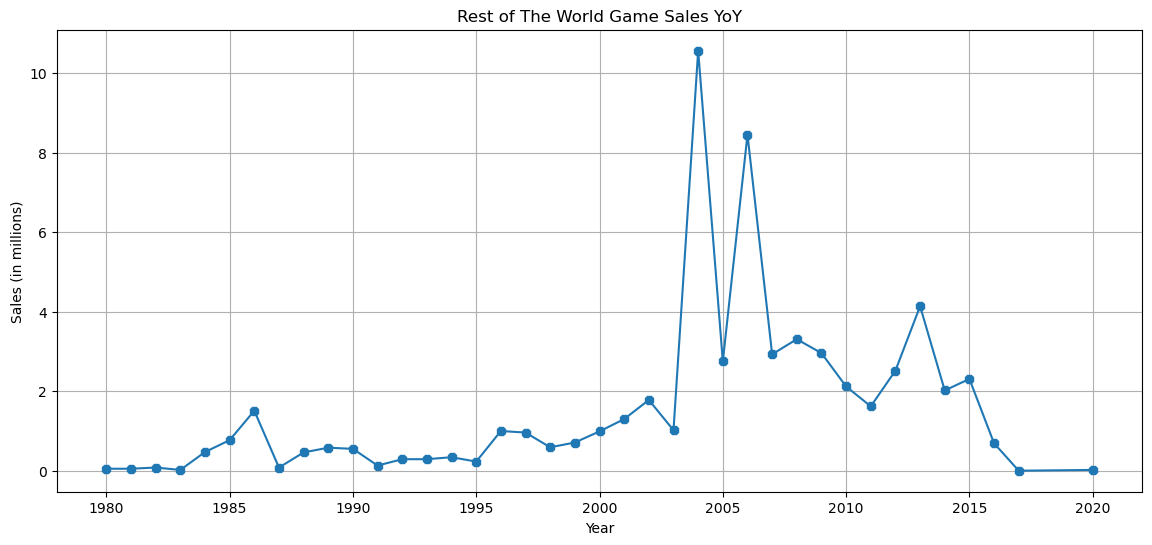

In [44]:
biggest_game_sale = vg.groupby('Year').apply(lambda x: x.loc[x['Other_Sales'].idxmax()]).reset_index(drop=True)
sort_biggest_game_sale = biggest_game_sale.sort_values(by='Year', ascending=True)

# plotting
plt.figure(figsize=(14,6))
plt.plot(sort_biggest_game_sale['Year'], sort_biggest_game_sale['Other_Sales'], marker='8')

# labels
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Rest of The World Game Sales YoY')

plt.grid(True)

plt.show()

##### Publisher Sales per Region

Global (worldwide)

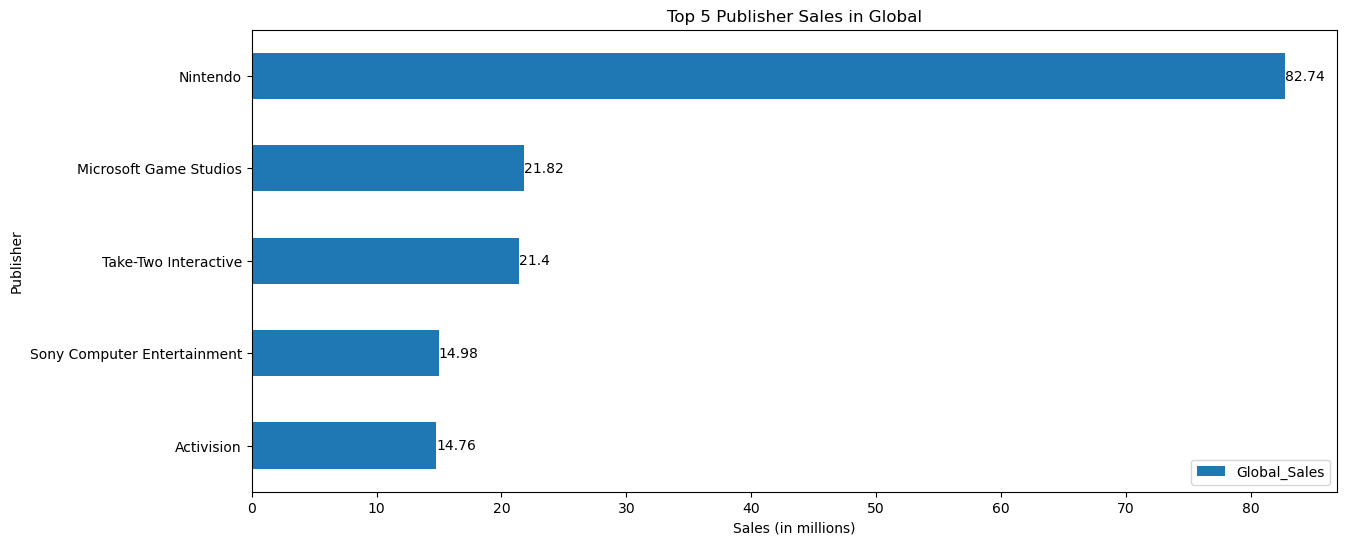

In [45]:
publisher_global_sales = vg.groupby('Publisher')['Global_Sales'].max().reset_index()
sort_publisher_global_sales = publisher_global_sales.sort_values(by='Global_Sales', ascending=True).tail(5)

# plotting
sort_publisher_global_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_global_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in Global')
plt.xlabel('Sales (in millions)')

plt.show()

NA

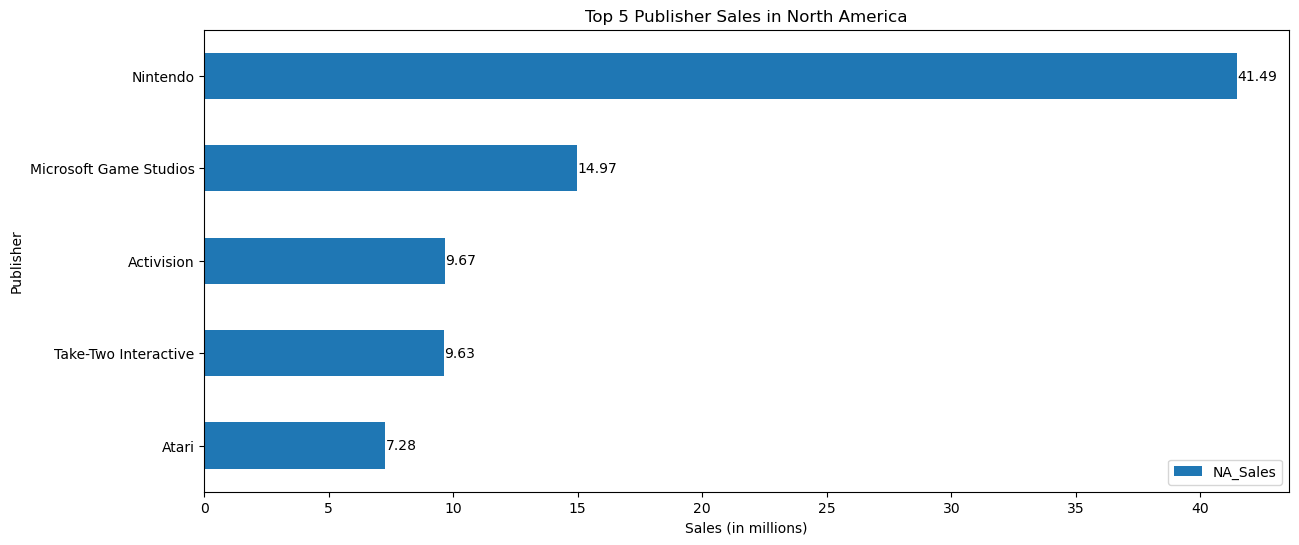

In [46]:
publisher_NA_sales = vg.groupby('Publisher')['NA_Sales'].max().reset_index()
sort_publisher_NA_sales = publisher_NA_sales.sort_values(by='NA_Sales', ascending=True).tail(5)

# plotting
sort_publisher_NA_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_NA_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in North America')
plt.xlabel('Sales (in millions)')

plt.show()

JP

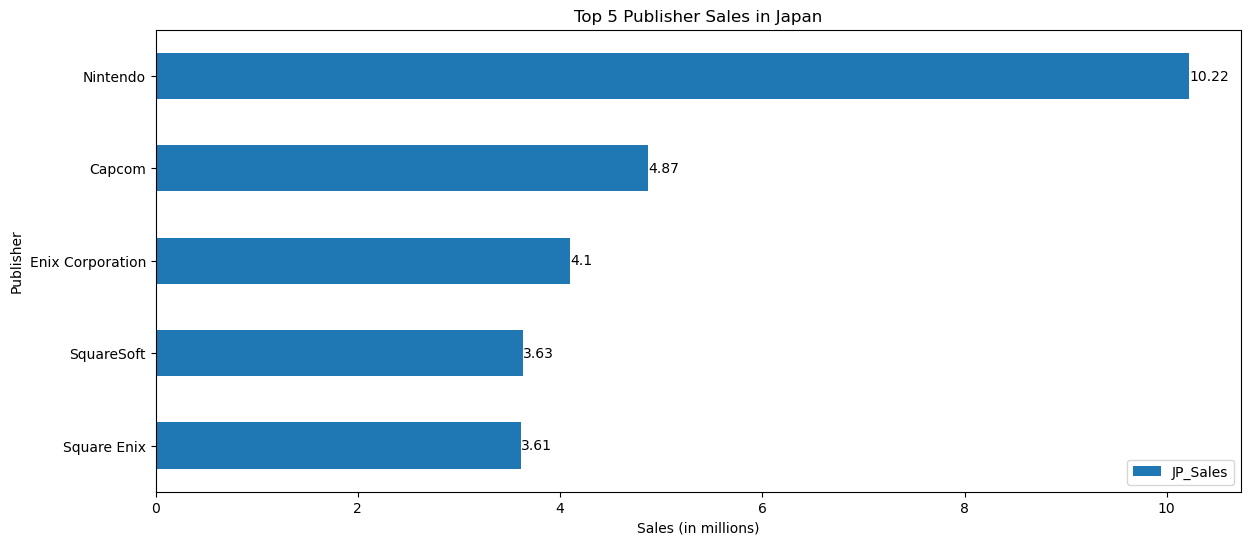

In [47]:
publisher_JP_sales = vg.groupby('Publisher')['JP_Sales'].max().reset_index()
sort_publisher_JP_sales = publisher_JP_sales.sort_values(by='JP_Sales', ascending=True).tail(5)

# plotting
sort_publisher_JP_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_JP_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in Japan')
plt.xlabel('Sales (in millions)')

plt.show()

EU

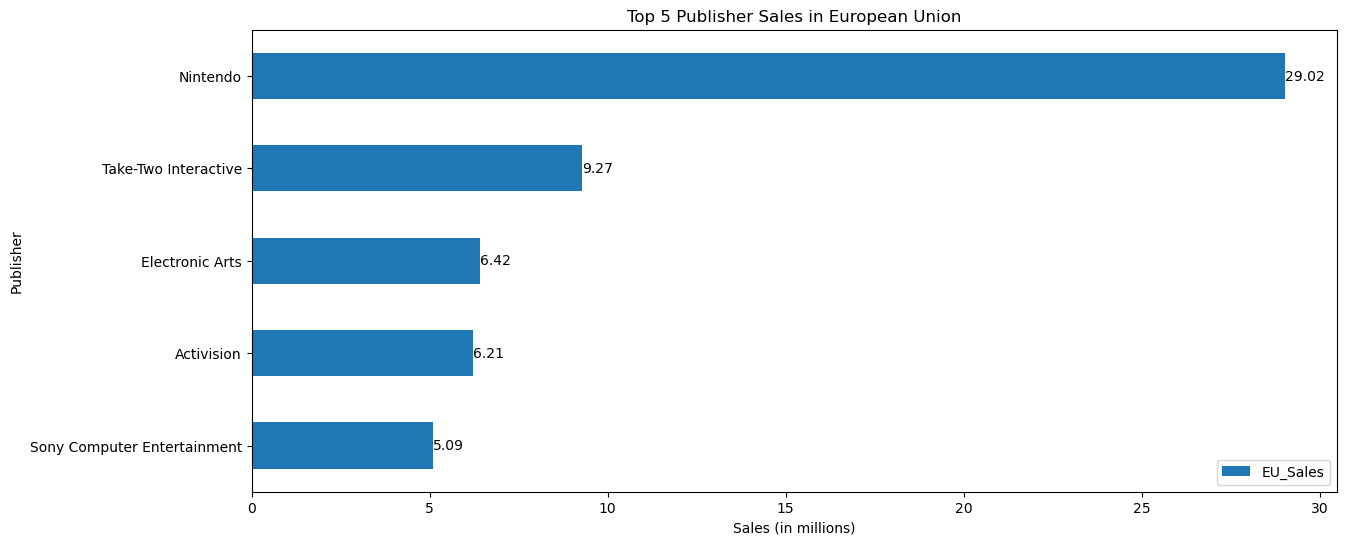

In [48]:
publisher_EU_sales = vg.groupby('Publisher')['EU_Sales'].max().reset_index()
sort_publisher_EU_sales = publisher_EU_sales.sort_values(by='EU_Sales', ascending=True).tail(5)

# plotting
sort_publisher_EU_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_EU_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in European Union')
plt.xlabel('Sales (in millions)')

plt.show()

Other (rest of the world)

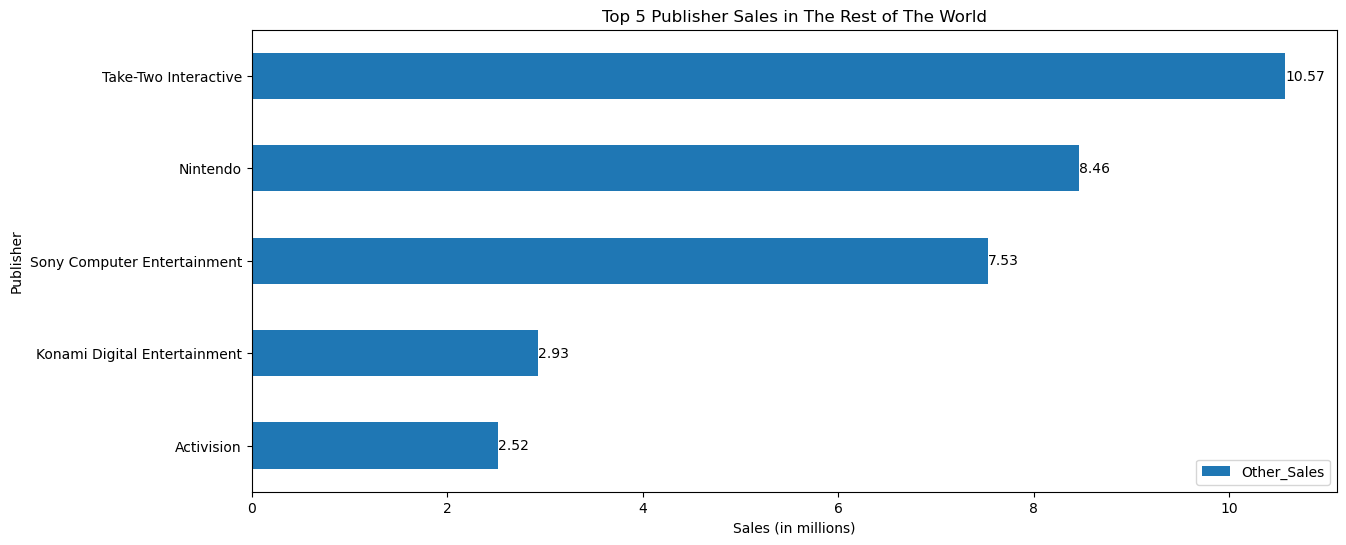

In [49]:
publisher_other_sales = vg.groupby('Publisher')['Other_Sales'].max().reset_index()
sort_publisher_other_sales = publisher_other_sales.sort_values(by='Other_Sales', ascending=True).tail(5)

# plotting
sort_publisher_other_sales.set_index('Publisher', inplace=True)
ax = sort_publisher_other_sales.plot(kind='barh', figsize=(14,6))

# barh annotate
ax.bar_label(ax.containers[0])

# labels
plt.title('Top 5 Publisher Sales in The Rest of The World')
plt.xlabel('Sales (in millions)')

plt.show()

##### Publisher With The Highest Count of Released Title

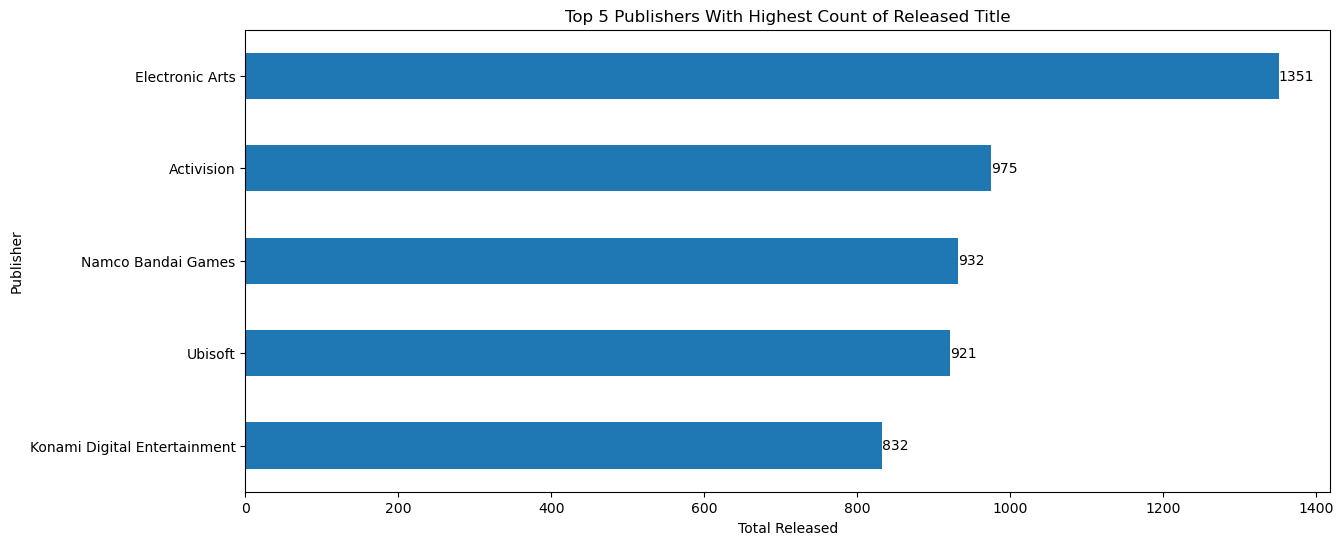

In [50]:
publishers = vg['Publisher'].value_counts()
top_publishers = publishers.head(5).sort_values(ascending=True)
ax = top_publishers.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Publishers With Highest Count of Released Title')
plt.xlabel('Total Released')
plt.ylabel('Publisher')
plt.show()

##### Most Popular Game Genre per Region

Global (worldwide)

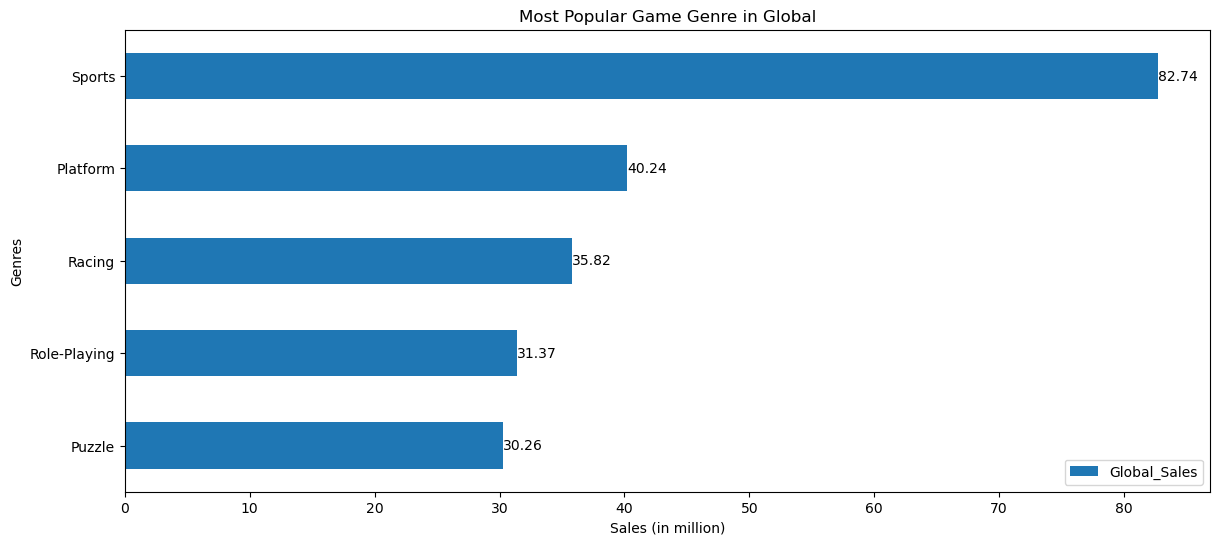

In [51]:
genres_global = vg.groupby('Genre')['Global_Sales'].max().reset_index()
genres_sort_global = genres_global.sort_values(by='Global_Sales', ascending=True).tail(5)

# plotting
genres_sort_global.set_index('Genre', inplace=True)
ax = genres_sort_global.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in Global')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

NA

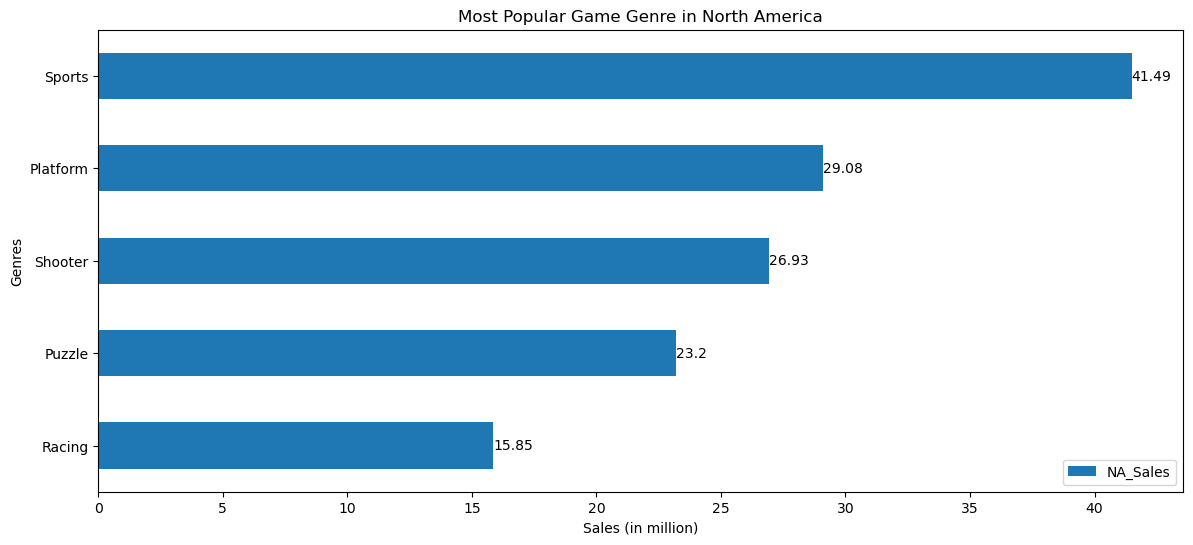

In [52]:
genres_NA = vg.groupby('Genre')['NA_Sales'].max().reset_index()
genres_sort_NA = genres_NA.sort_values(by='NA_Sales', ascending=True).tail(5)

# plotting
genres_sort_NA.set_index('Genre', inplace=True)
ax = genres_sort_NA.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in North America')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

JP

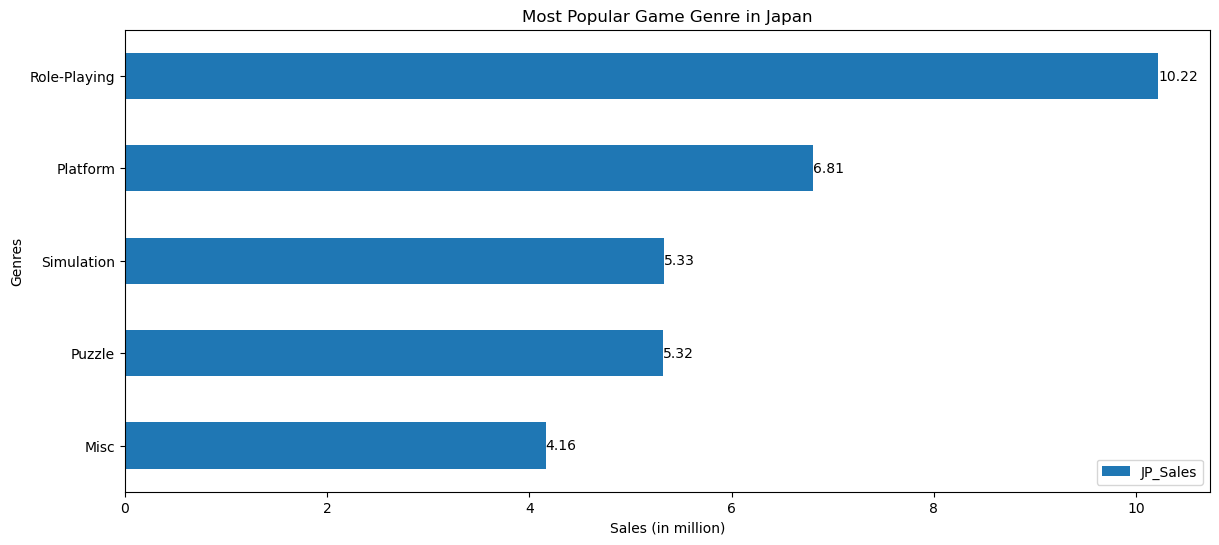

In [53]:
genres_JP = vg.groupby('Genre')['JP_Sales'].max().reset_index()
genres_sort_JP = genres_JP.sort_values(by='JP_Sales', ascending=True).tail(5)

# plotting
genres_sort_JP.set_index('Genre', inplace=True)
ax = genres_sort_JP.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in Japan')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

EU

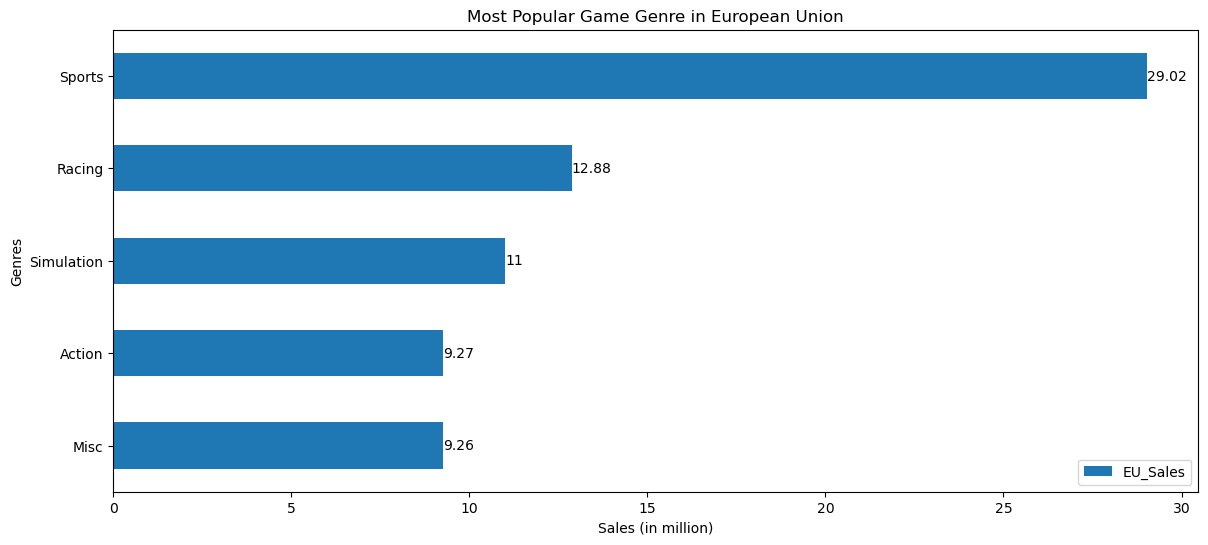

In [54]:
genres_EU = vg.groupby('Genre')['EU_Sales'].max().reset_index()
genres_sort_EU = genres_EU.sort_values(by='EU_Sales', ascending=True).tail(5)

# plotting
genres_sort_EU.set_index('Genre', inplace=True)
ax = genres_sort_EU.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in European Union')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

Other (rest of the world)

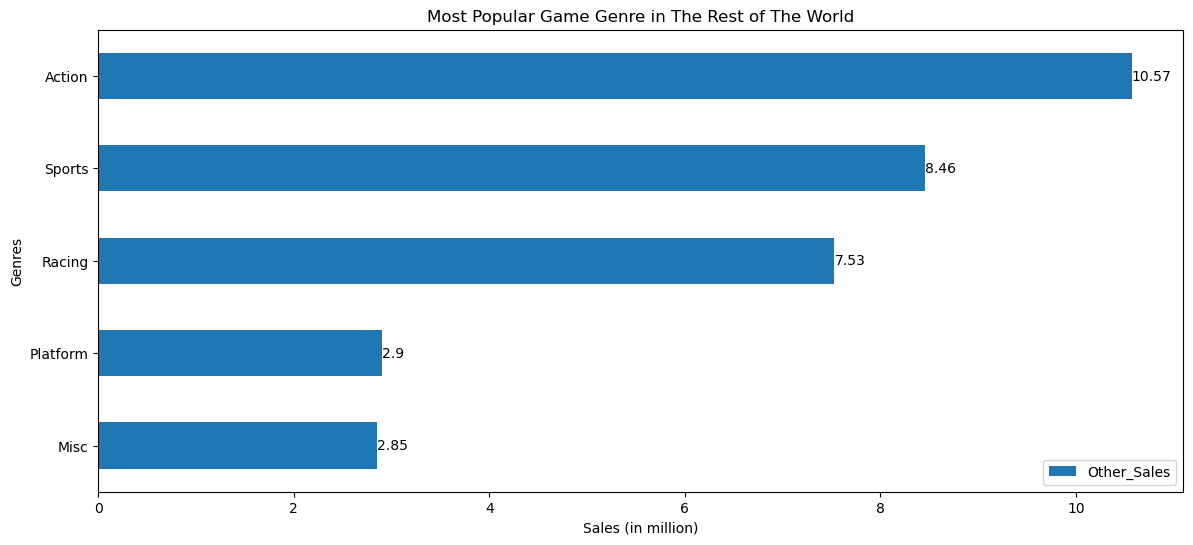

In [55]:
genres_other = vg.groupby('Genre')['Other_Sales'].max().reset_index()
genres_sort_other = genres_other.sort_values(by='Other_Sales', ascending=True).tail(5)

# plotting
genres_sort_other.set_index('Genre', inplace=True)
ax = genres_sort_other.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Most Popular Game Genre in The Rest of The World')
plt.xlabel('Sales (in million)')
plt.ylabel('Genres')

plt.show()

##### Most Popular Game Platform per Released Title

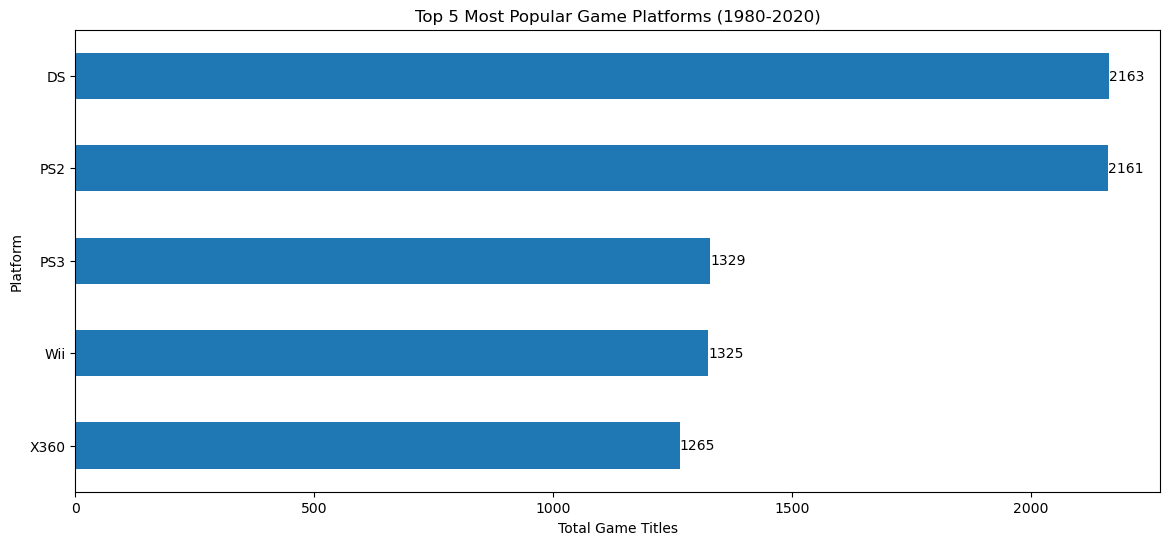

In [56]:
platforms = vg['Platform'].value_counts()
top_platforms = platforms.head(5).sort_values(ascending=True)
ax = top_platforms.plot(kind='barh', figsize=(14,6))

# annotate barh
ax.bar_label(ax.containers[0])

plt.title('Top 5 Most Popular Game Platforms (1980-2020)')
plt.xlabel('Total Game Titles')
plt.ylabel('Platform')

plt.show()

#### Summary

- North America has the highest market share for video game sales, with almost 50% worldwide sales are from the region.

- Wii Sports dominated the video game sales on the Global Scale, being the most sold video games on North America and European Union.

- 2006 saw the highest growth for video game sales on the Global Scale, except for the Others (rest of the world) in 2004 due to GTA San Andreas being released that year.

- Nintendo became the most dominated video game publisher on 3 (NA, JP, EU) out of 4 regions, with the exception of Take-Two Interactive on the rest of the world.

- Publisher Electronic Arts has the highest amount of released game titles with the staggering amount of 1351 titles.

- Sports being the most preferred genre of video game on Global Scale, with the exception of Role-Playing in Japan and Action on the rest of the world.

- Nintendo DS and PlayStation 2 are the most popular platform for video games.